In [2]:
import numpy as np
import pandas as pd
import matplotlib.pyplot as plt
import tensorflow as tf
from PIL import Image
import os 
from sklearn.model_selection import train_test_split
from tensorflow.keras.utils import to_categorical
from tensorflow.keras.models import Sequential
from tensorflow.keras.layers import Conv2D,MaxPool2D,Dense,Flatten,Dropout


In [3]:
data = []
labels = []
classes = 43 
cur_path = os.getcwd()
for i in range(0,classes): 
    path = os.path.join(cur_path,"Train",str(i)) 
    images = os.listdir(path) 
    
    for a in images: 
        try: 
            image = Image.open(path +'\\' + a) 
            image = image.resize((30,30)) 
            image = np.array(image) 
            data.append(image) 
            labels.append(i) 
        except: 
            print("Error loading image") 
data = np.array(data)
labels = np.array(labels)

In [4]:
print(data.shape, labels.shape)
#Splitting training and testing dataset
X_train, X_test, y_train, y_test = train_test_split(data, labels, test_size=0.2, random_state=42)
print(X_train.shape, X_test.shape, y_train.shape, y_test.shape)


(39209, 30, 30, 3) (39209,)
(31367, 30, 30, 3) (7842, 30, 30, 3) (31367,) (7842,)


In [5]:
#Converting the labels into one hot encoding
y_train = to_categorical(y_train, 43)
y_test = to_categorical(y_test, 43)

In [6]:
#Building the model
model = Sequential()
model.add(Conv2D(filters=32, kernel_size=(5,5), activation='relu', input_shape=X_train.shape[1:]))
model.add(Conv2D(filters=32, kernel_size=(5,5), activation='relu'))
model.add(MaxPool2D(pool_size=(2, 2)))
model.add(Dropout(rate=0.25))
model.add(Conv2D(filters=64, kernel_size=(3, 3), activation='relu'))
model.add(Conv2D(filters=64, kernel_size=(3, 3), activation='relu'))
model.add(MaxPool2D(pool_size=(2, 2)))
model.add(Dropout(rate=0.25))
model.add(Flatten())
model.add(Dense(256, activation='relu'))
model.add(Dropout(rate=0.5))
model.add(Dense(43, activation='softmax'))
#Compilation of the model
model.compile(loss='categorical_crossentropy', optimizer='adam', metrics=['accuracy'])

In [7]:
# More than 1 hour it took to train this model
epochs = 25
history = model.fit(X_train, y_train, batch_size=64, epochs=epochs, validation_data=(X_test, y_test))


Epoch 1/25
491/491 [==============================] - 213s 422ms/step - loss: 1.8551 - accuracy: 0.5499 - val_loss: 0.2684 - val_accuracy: 0.9399
Epoch 2/25
491/491 [==============================] - 196s 400ms/step - loss: 0.4651 - accuracy: 0.8711 - val_loss: 0.1158 - val_accuracy: 0.9758
Epoch 3/25
491/491 [==============================] - 206s 419ms/step - loss: 0.2713 - accuracy: 0.9261 - val_loss: 0.0798 - val_accuracy: 0.9819
Epoch 4/25
491/491 [==============================] - 206s 420ms/step - loss: 0.2005 - accuracy: 0.9470 - val_loss: 0.0739 - val_accuracy: 0.9836
Epoch 5/25
491/491 [==============================] - 203s 414ms/step - loss: 0.1637 - accuracy: 0.9561 - val_loss: 0.0338 - val_accuracy: 0.9916
Epoch 6/25
491/491 [==============================] - 200s 407ms/step - loss: 0.1519 - accuracy: 0.9592 - val_loss: 0.0539 - val_accuracy: 0.9857
Epoch 7/25
491/491 [==============================] - 203s 414ms/step - loss: 0.1415 - accuracy: 0.9616 - val_loss: 0.0384 -

In [8]:
model.save("my_model.h5")

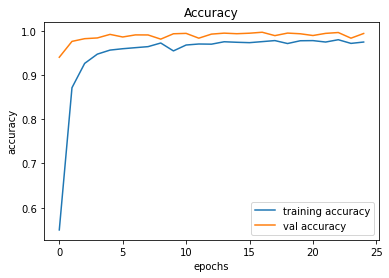

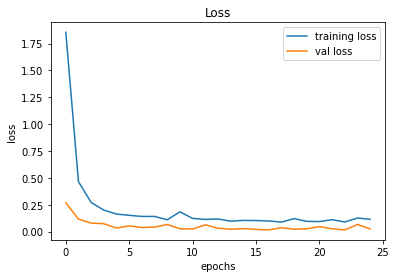

In [9]:

#plotting graphs for accuracy 
plt.figure(0)
plt.plot(history.history['accuracy'], label='training accuracy')
plt.plot(history.history['val_accuracy'], label='val accuracy')
plt.title('Accuracy')
plt.xlabel('epochs')
plt.ylabel('accuracy')
plt.legend()
plt.show()
plt.figure(1)
plt.plot(history.history['loss'], label='training loss')
plt.plot(history.history['val_loss'], label='val loss')
plt.title('Loss')
plt.xlabel('epochs')
plt.ylabel('loss')
plt.legend()
plt.show()

In [10]:

#testing accuracy on test dataset
from sklearn.metrics import accuracy_score
import pandas as pd
y_test = pd.read_csv('Test.csv')

labels = y_test["ClassId"].values
imgs = y_test["Path"].values

data=[]

for img in imgs:
    image = Image.open(img)
    image = image.resize((30,30))
    data.append(np.array(image))

X_test=np.array(data)

pred=np.argmax(model.predict(X_test), axis=1)
#Accuracy with the test data
from sklearn.metrics import accuracy_score
print(accuracy_score(labels, pred))


395/395 [==============================] - 19s 47ms/step
0.9654790182106097


In [11]:
model.save("my_model.h5")

In [12]:
model.save_weights("model_weights.h5")